In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [158]:
df = pd.read_csv('datasets/fake_bills.csv', delimiter=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [159]:
# convert True/False to 1/0
#df['is_genuine'] = df['is_genuine'].astype(int)
#df

In [160]:
df = df.dropna()
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [161]:
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = df['is_genuine']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [165]:
predictions = logmodel.predict(X_test)

In [166]:
print(classification_report(y_test, predictions))

acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

       False       1.00      0.95      0.98       131
        True       0.98      1.00      0.99       308

    accuracy                           0.99       439
   macro avg       0.99      0.98      0.98       439
weighted avg       0.99      0.99      0.99       439


Model overall accuracy: 98.63%


In [167]:
print(confusion_matrix(y_test, predictions))

[[125   6]
 [  0 308]]


<AxesSubplot: >

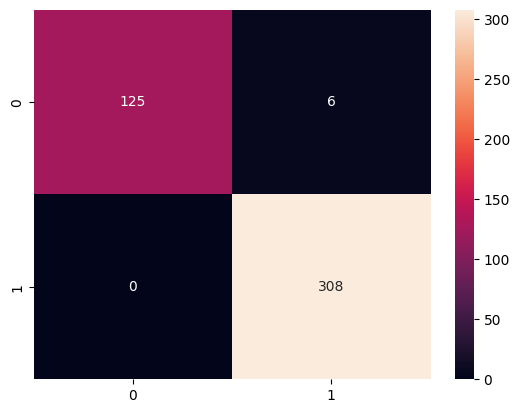

In [168]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [169]:
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

0.5

In [170]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [172]:
tester_row = {
    'diagonal': 172,
    'height_left': 103.2,
    'height_right': 103.2,
    'margin_low': 3,
    'margin_up': 3,
    'length': 112  
}

tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

labels = ["False", "True"]

print("Is this bill fake (True/False):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[4.51809691e-05 9.99954819e-01]]

Is this bill fake (True/False):
True
-------------------


C:\Users\Monit\AppData\Local\Temp\ipykernel_11452\2469621872.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  result = labels[logmodel.predict(tester_row)[0]]
